In [159]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [160]:
data = pd.read_csv('marks.txt', sep=",", header=None)

In [161]:
X = data.iloc[:, :-1]

In [162]:
y = data.iloc[:, -1]

In [163]:
X

,0,1
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
...,...,...
95,83.489163,48.380286
96,42.261701,87.103851
97,99.315009,68.775409
98,55.340018,64.931938


In [164]:
admitted = data.loc[y == 1]
not_admitted = data.loc[y == 0]

In [158]:
admitted

,0,1,2
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1
12,82.307053,76.481963,1
13,69.364589,97.718692,1
15,53.971052,89.207350,1
16,69.070144,52.740470,1


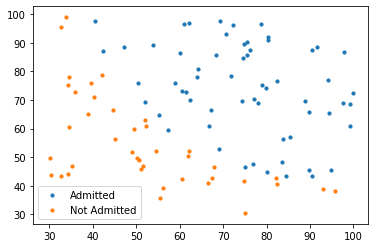

In [143]:
# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [166]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

In [167]:
X

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331],
       [ 1.        , 95.86155507, 38.22527806],
       [ 1.        , 75.01365839, 30.60326323],
       [ 1.        , 82.30705337, 76.4819633 ],
       [ 1.        , 69.36458876, 97.71869196],
       [ 1.        , 39.53833914, 76.03681085],
       [ 1.        , 53.97105215, 89.20735014],
       [ 1.        , 69.07014406, 52.74046973],
       [ 1.        , 67.94685548, 46.67857411],
       [ 1.        , 70.66150955, 92.92713789],
       [ 1.        , 76.97878373, 47.57596365],
       [ 1.        , 67.37202755, 42.838

In [165]:
X

,0,1
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
...,...,...
95,83.489163,48.380286
96,42.261701,87.103851
97,99.315009,68.775409
98,55.340018,64.931938


In [145]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))


In [146]:
def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)


In [147]:
def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [148]:
def cost_function( theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

In [149]:
def gradient( theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

In [150]:
from scipy.optimize import fmin_tnc
import scipy.optimize as opt
def fit( x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights


In [151]:
parameters = fit(X, y, theta)[0]

In [152]:
parameters

array([-25.16131863,   0.20623159,   0.20147149])

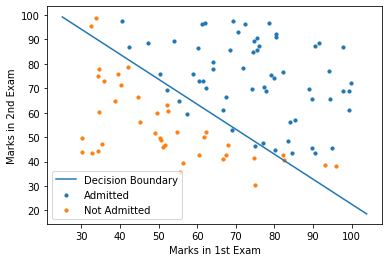

In [154]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [157]:
def predict( x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)
def accuracy( x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100
accuracy(X, y.flatten())

89.0

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)

C:\Users\Prerit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Prerit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [176]:
accuracy = accuracy_score(y.flatten(),predicted_classes)
parameters = model.coef_

In [177]:
accuracy

0.91

In [178]:
parameters

array([[-2.85831439,  0.05214733,  0.04531467]])